# Stock portfolio performance Data Set

#### Data Set Information:

There are three disadvantages of weighted scoring stock selection models. First, they cannot identify the relations between weights of stock-picking concepts and performances of portfolios. Second, they cannot systematically discover the optimal combination for weights of concepts to optimize the performances. Third, they are unable to meet various investors preferences. This study aims to more efficiently construct weighted scoring stock selection models to overcome these disadvantages. Since the weights of stock-picking concepts in a weighted scoring stock selection model can be regarded as components in a mixture, we used the simplex centroid mixture design to obtain the experimental sets of weights. These sets of weights are simulated with US stock market historical data to obtain their performances. Performance prediction models were built with the simulated performance data set and artificial neural networks. Furthermore, the optimization models to reflect investors preferences were built up, and the performance prediction models were employed as the kernel of the optimization models so that the optimal solutions can now be solved with optimization techniques. The empirical values of the performances of the optimal weighting combinations generated by the optimization models showed that they can meet various investors preferences and outperform those of S&P 500 not only during the training period but also during the testing period.

#### Data Access

https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance

#### Attribute Information:

The inputs are the weights of the stock-picking concepts as follows:

X1=the weight of the Large B/P concept 

X2=the weight of the Large ROE concept 

X3=the weight of the Large S/P concept 

X4=the weight of the Large Return Rate in the last quarter concept 

X5=the weight of the Large Market Value concept 

X6=the weight of the Small systematic Risk concept 


The outputs are the investment performance indicators (normalized) as follows:

Y1=Annual Return 

Y2=Excess Return 

Y3=Systematic Risk 

Y4=Total Risk 

Y5=Abs. Win Rate 

Y6=Rel. Win Rate

### Objective

In this notebook, a  neural networks was built using Sklearn MLPRegressor to predict the outcome each investment performances indicators. To optimize the outcome, the model was iterated to determine the best number model performance based on the number of hidden layers.  

### Libraries to be used

In [1]:
# Data Setup
import numpy as np
import pandas as pd
import seaborn as sns

# Linear Regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Data Import

In [2]:
df = pd.read_excel('stock portfolio performance data set.xlsx', skiprows=[0])

### EDA, Initial

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
ID                                         63 non-null int64
 Large B/P                                 63 non-null float64
 Large ROE                                 63 non-null float64
 Large S/P                                 63 non-null float64
 Large Return Rate in the last quarter     63 non-null float64
 Large Market Value                        63 non-null float64
 Small systematic Risk                     63 non-null float64
Annual Return                              63 non-null float64
Excess Return                              63 non-null float64
Systematic Risk                            63 non-null float64
Total Risk                                 63 non-null float64
Abs. Win Rate                              63 non-null float64
Rel. Win Rate                              63 non-null float64
Annual Return.1                            63 non-null float64
Excess Return.1  

In [4]:
df.isnull().any()

ID                                         False
 Large B/P                                 False
 Large ROE                                 False
 Large S/P                                 False
 Large Return Rate in the last quarter     False
 Large Market Value                        False
 Small systematic Risk                     False
Annual Return                              False
Excess Return                              False
Systematic Risk                            False
Total Risk                                 False
Abs. Win Rate                              False
Rel. Win Rate                              False
Annual Return.1                            False
Excess Return.1                            False
Systematic Risk.1                          False
Total Risk.1                               False
Abs. Win Rate.1                            False
Rel. Win Rate.1                            False
dtype: bool

In [5]:
df.describe()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.040384,0.010196,1.206636,0.124854,0.578571,0.552381,0.570737,0.563039,0.413916,0.397544,0.628571,0.536508
std,18.330303,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.028337,0.007972,0.271843,0.031626,0.043731,0.100975,0.112040,0.115526,0.143286,0.135746,0.104956,0.134633
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053382,-0.014856,0.800792,0.078831,0.400000,0.300000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021405,0.004378,0.997674,0.100883,0.550000,0.500000,0.495695,0.478730,0.303774,0.294651,0.560000,0.466667
50%,32.000000,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.042629,0.010413,1.181784,0.119563,0.550000,0.550000,0.579611,0.566175,0.400817,0.374831,0.560000,0.533333
75%,47.500000,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.061776,0.015840,1.363218,0.139269,0.600000,0.650000,0.655315,0.644828,0.496449,0.459415,0.680000,0.666667
max,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.098369,0.026548,1.939118,0.218617,0.650000,0.750000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [6]:
df.shape

(63, 19)

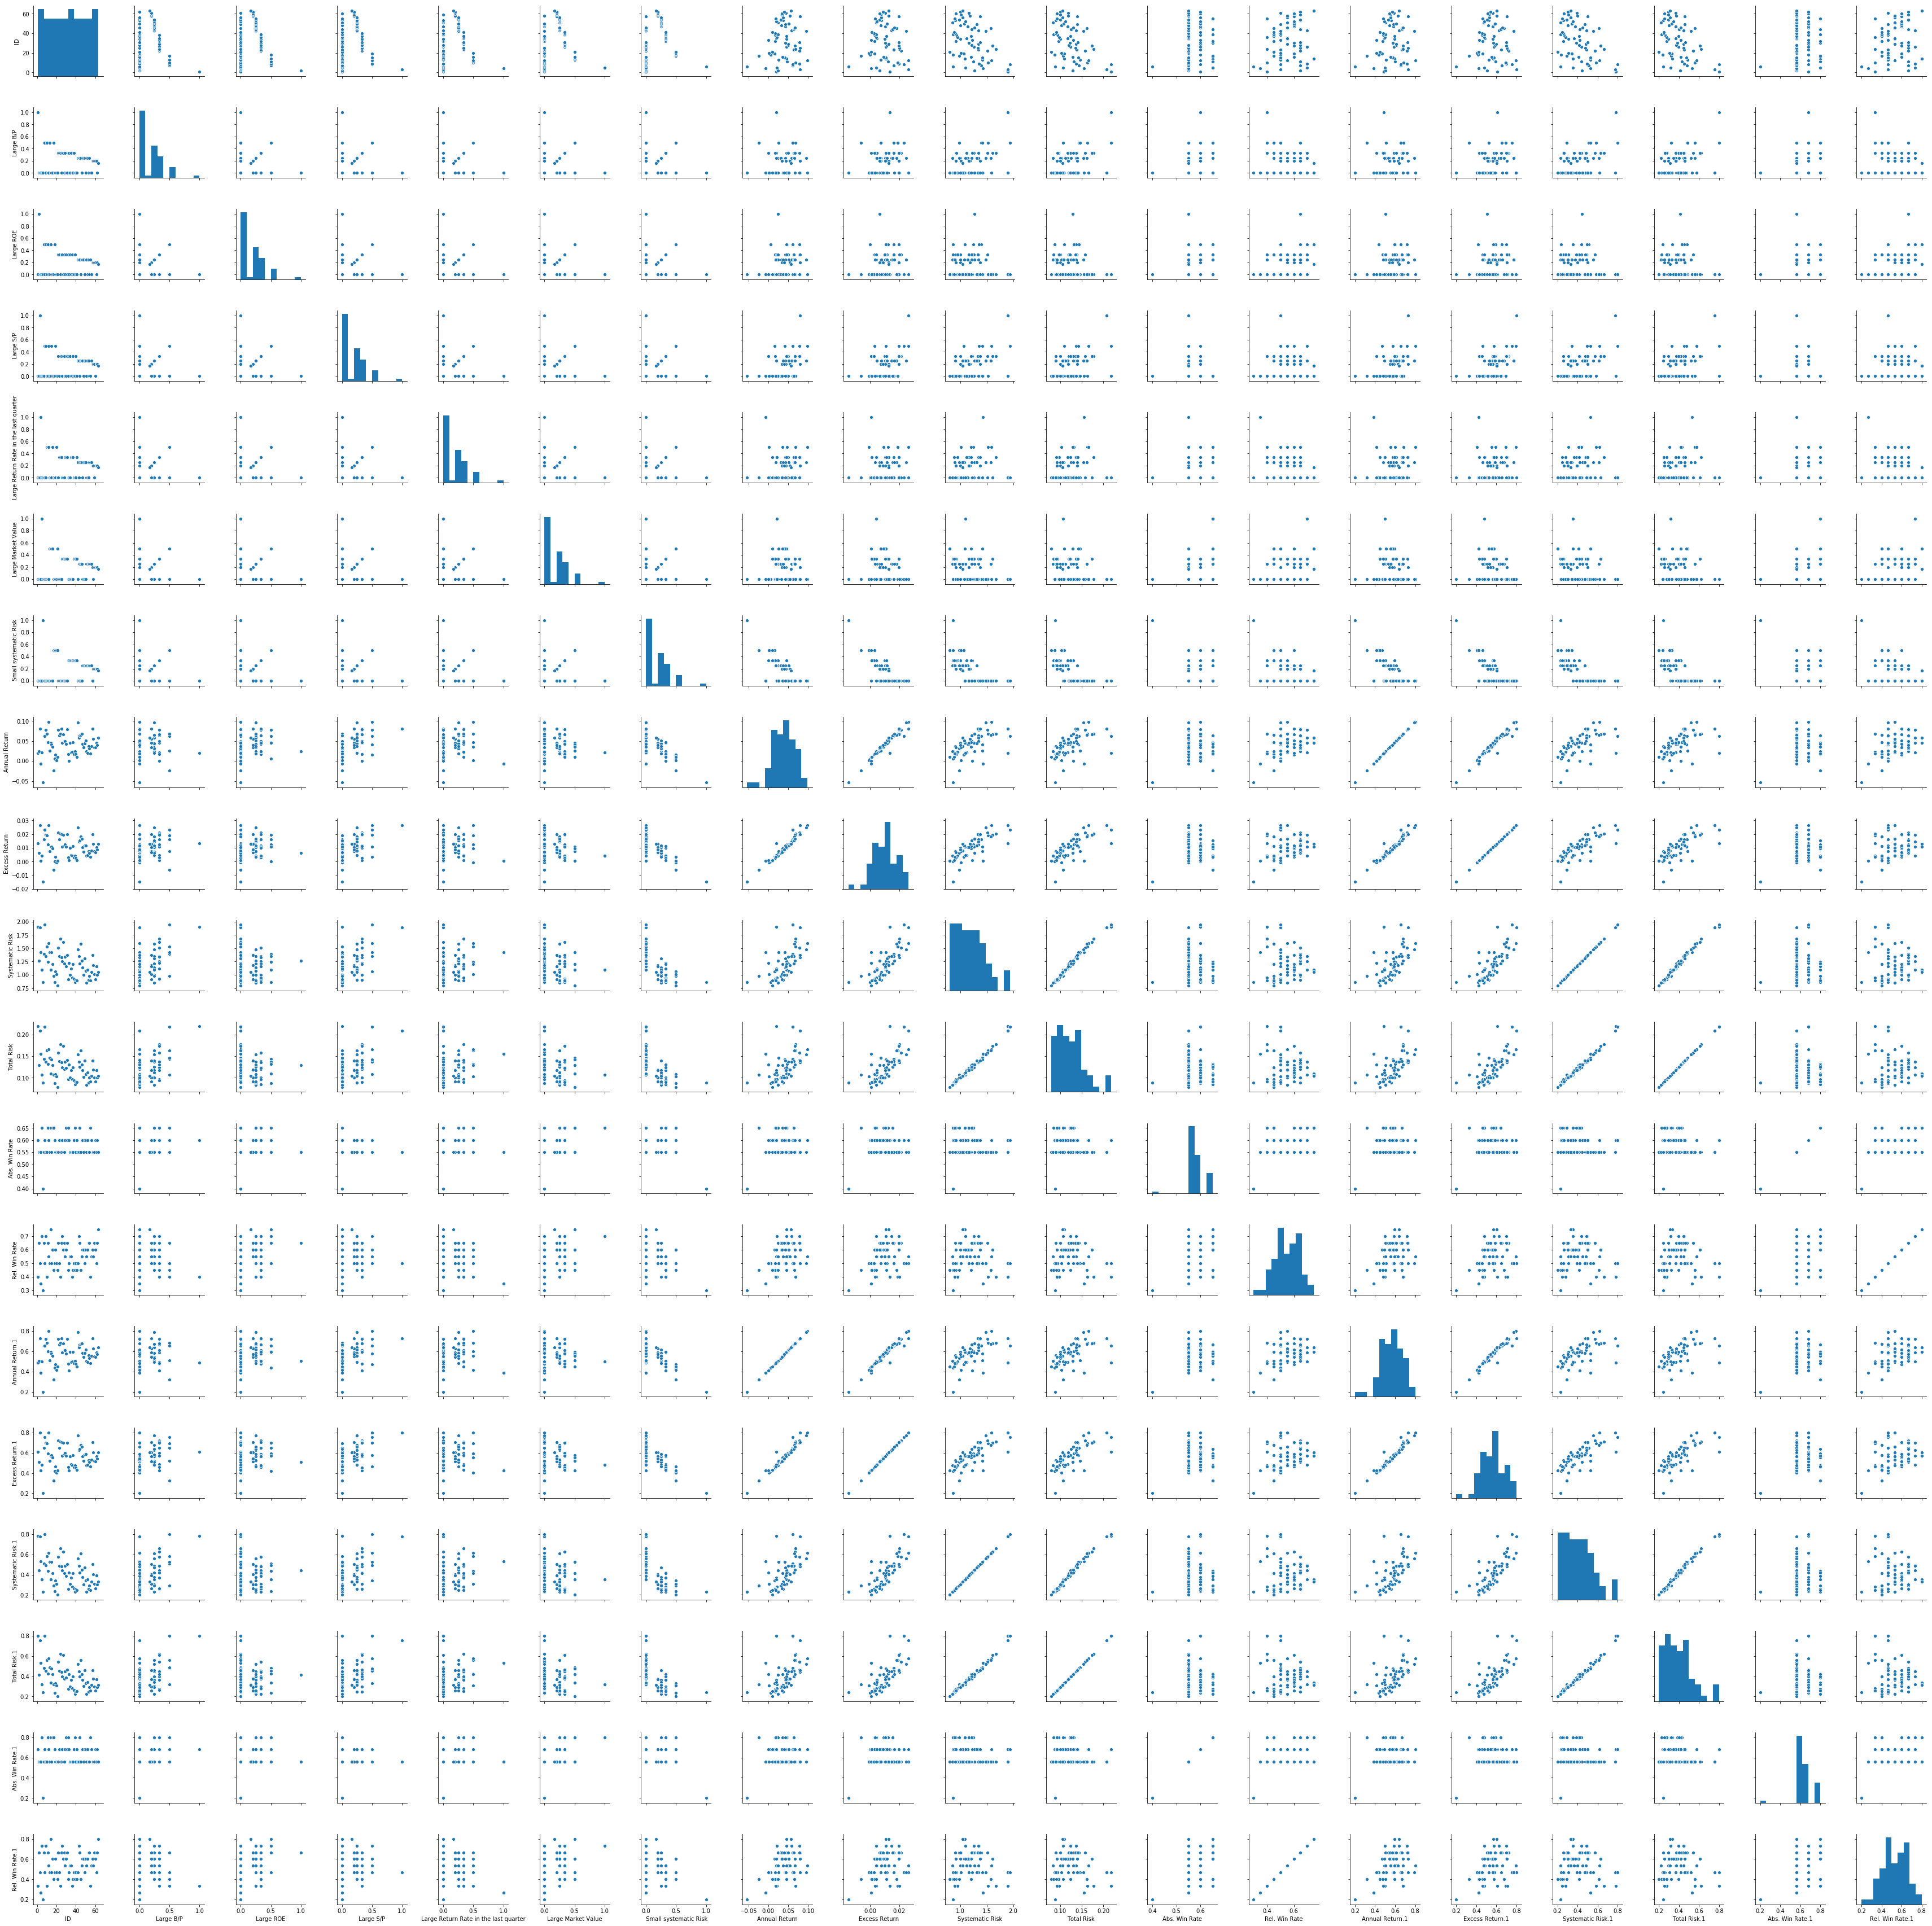

In [7]:
sns.pairplot(df)

### Data Setup, EDA Continued

This data set

In [8]:
#Data to be used al filtered as a new data frame.
df_n = df.iloc[:, 1:13]
df_n.shape
print('The shape of the new data frame is: {}'.format(df_n.shape))

# Data selection
x = df_n.iloc[:,0:6]
y = df_n.iloc[:, 6:]

#y1 = df_n['Annual Return']
#y2 = df_n['Excess Return']
#y3 = df_n['Systematic Risk']
#y4 = df_n['Total Risk']
#y5 = df_n['Abs. Win Rate']
#y6 = df_n['Rel. Win Rate']
print('Shape of x: {}\nShape of y: {}'.format(x.shape, y.shape))


The shape of the new data frame is: (63, 12)
Shape of x: (63, 6)
Shape of y: (63, 6)


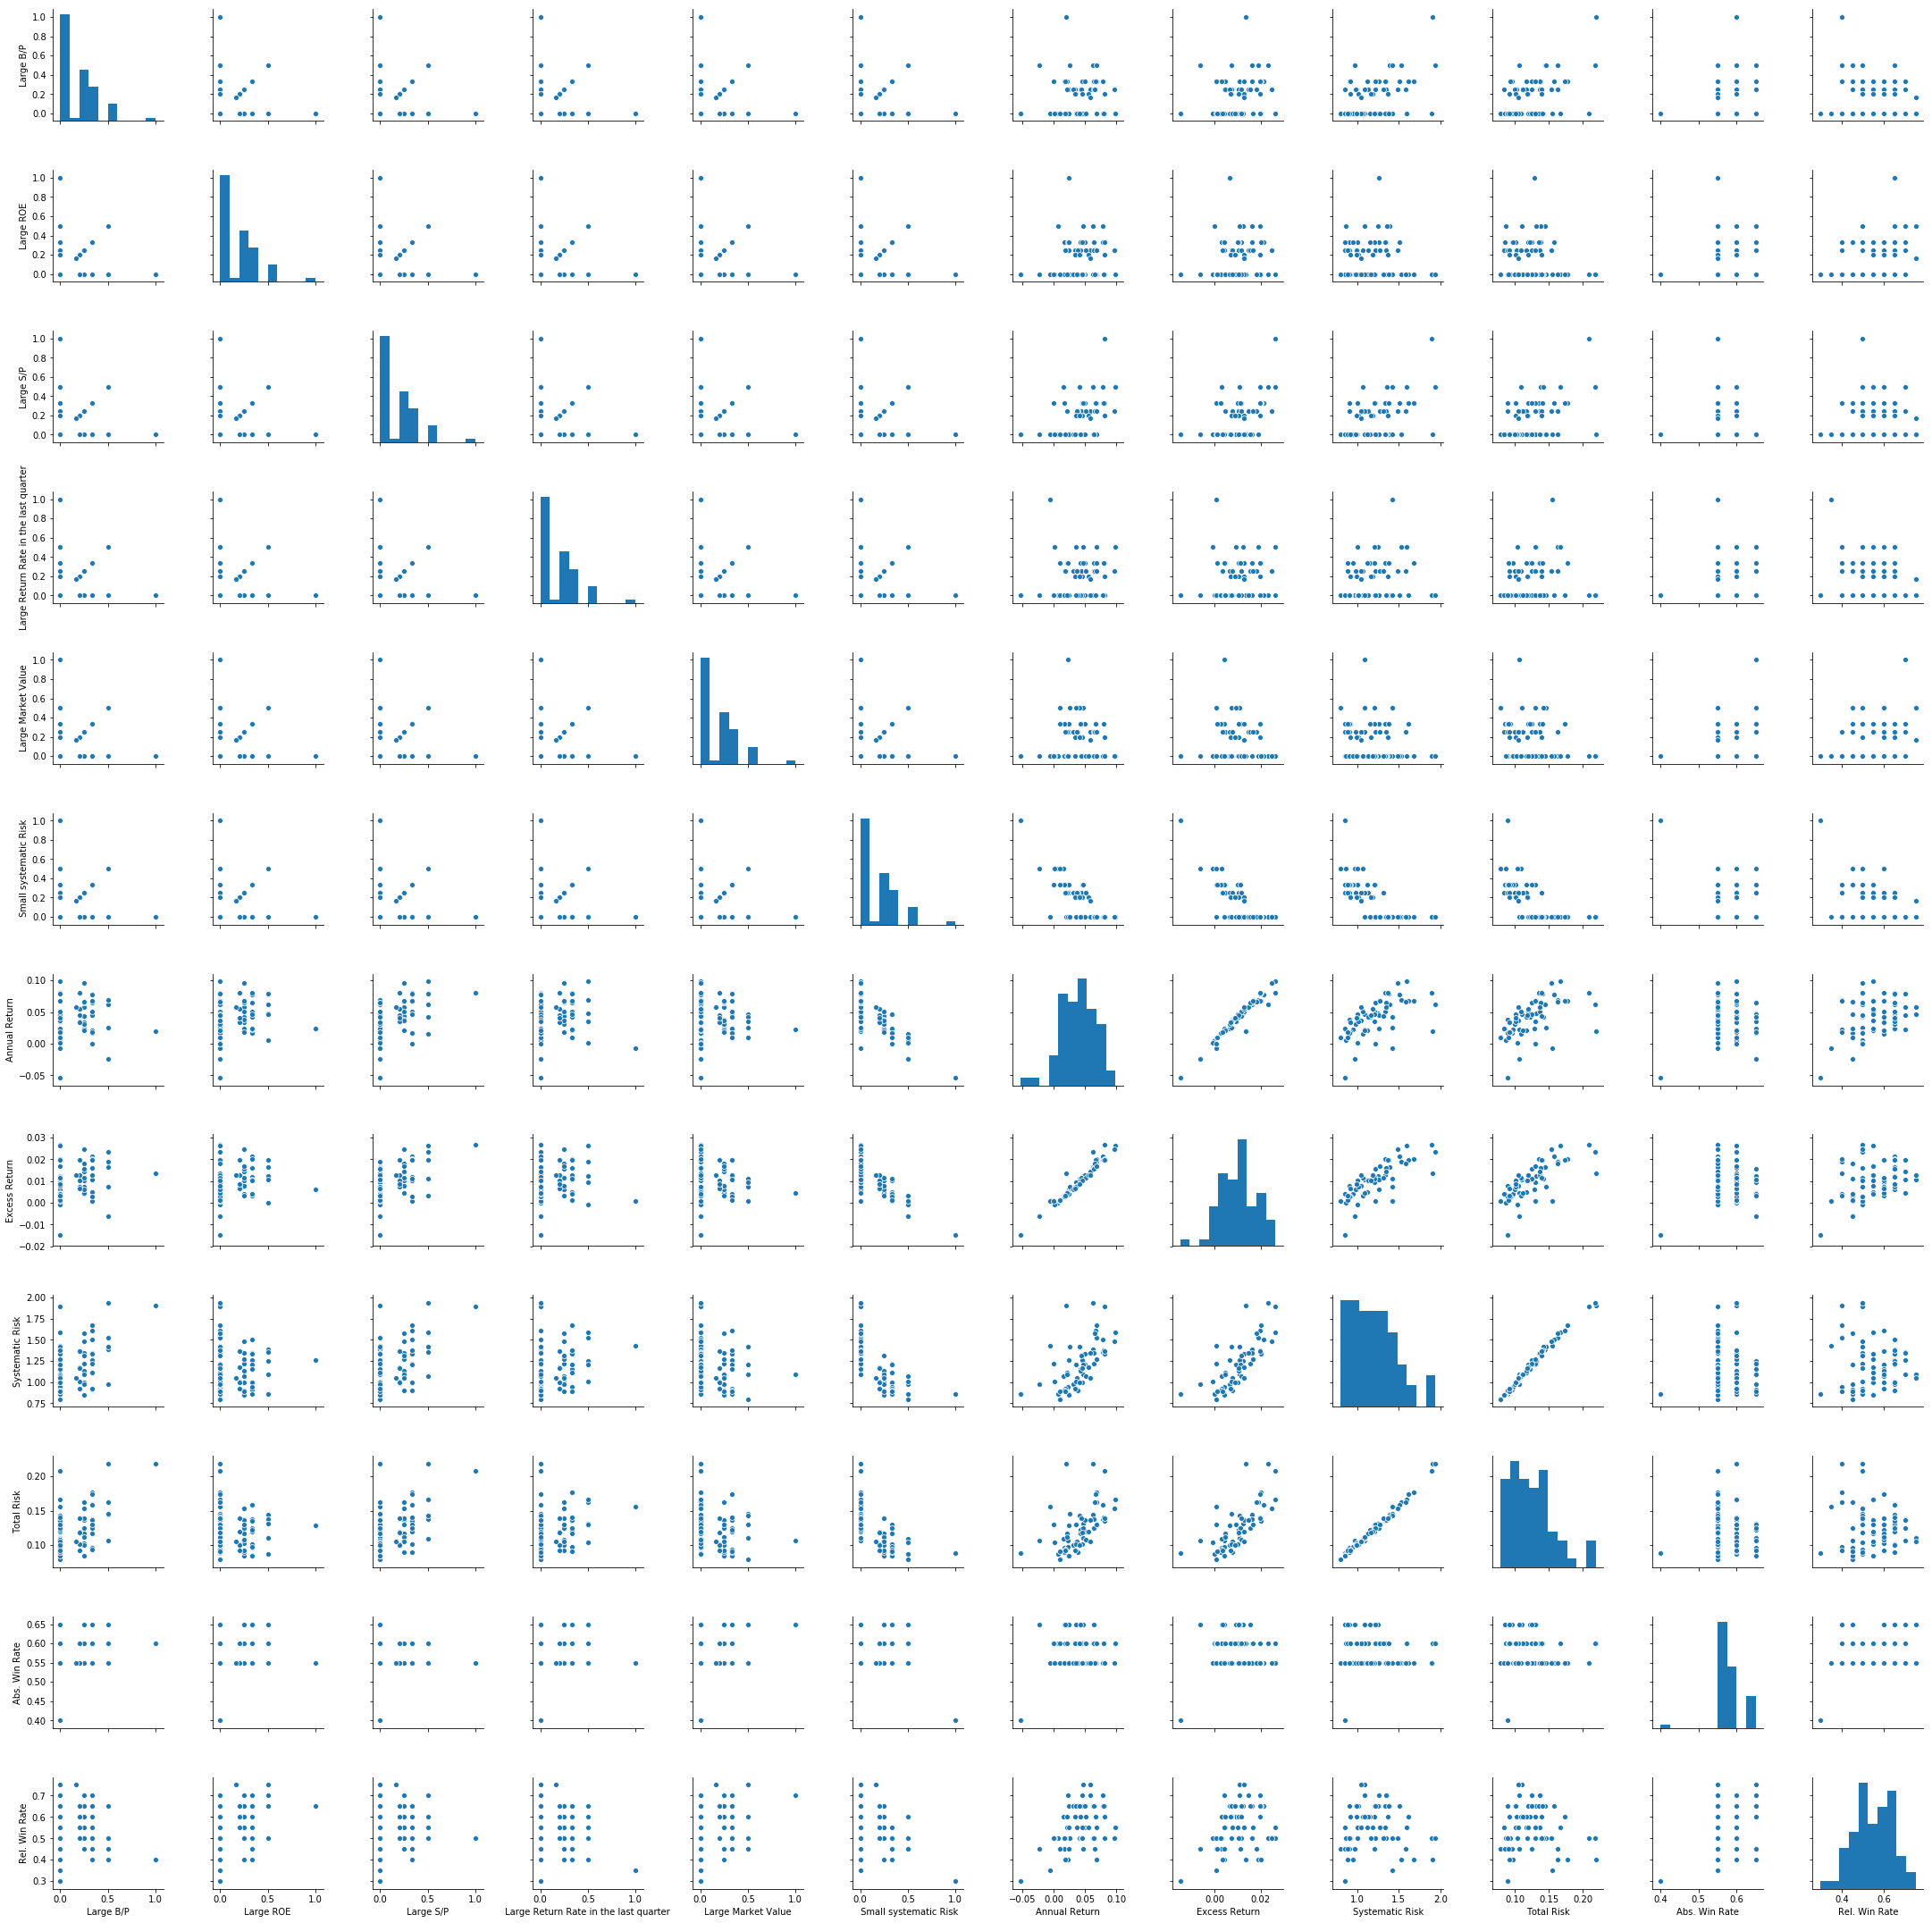

In [9]:
sns.pairplot(df_n)

### Model Selection

To obtain the best numbers o f hidden layers, the code below iterates different over the model with different hidden layers. For each iteration R Squared and the Mean Squared Error of the model being will be attached to a  list. Then, by filtering the maximum R Squared and the minimum Mean Squared Error the best number of hidden layyers was determined.

In [15]:
#best_parameters = []
#best_score = []

score_l = []
mse_l = []

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 12, test_size=0.3)
t = range(1, 2010, 10)
for i in t:
    model = MLPRegressor(solver='lbfgs', learning_rate_init=0.019,hidden_layer_sizes=(int(i),), activation='identity', 
                     learning_rate='adaptive')
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    score_l.append(score)
    mse_l.append(mse)

df_params = pd.DataFrame({'R^2':score_l, 'mse':mse_l }, index=t)
df_params.shape

(201, 2)

In [16]:
# Model Selection
df_params['R^2'].max(), df_params['mse'].min()

maxs = df_params[df_params['R^2']==df_params['R^2'].max()]

mins = df_params[df_params['mse']==df_params['mse'].min()]

print('Maximum R^2: \n{} \n\nMinimum Mean Squared error: \n{} \n \nThe best number of hidden layers:{}'. format(maxs , mins, mins.index))

Maximum R^2: 
          R^2       mse
801  0.782108  0.003329 

Minimum Mean Squared error: 
          R^2       mse
801  0.782108  0.003329 
 
The best number of hidden layers:Int64Index([801], dtype='int64')
